In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ConvNeXtBase, ConvNeXtXLarge
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
train_dir = '/Users/davemag9/Desktop/Diploma/archive1/Indian Food Images/Indian Food Images'

train_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/train_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if
                  os.path.isdir(os.path.join(train_dir, d))]
subdirectories

['/Users/davemag9/Desktop/Diploma/food20dataset/train_set/vada pav',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/idly',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/bisibelebath',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ice_cream',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/samosa',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/paniyaram',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chicken_curry',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/cheesecake',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/meduvadai',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ven pongal',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/hot_dog',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/dhokla',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/apple_pie',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chaat',
 '/Users/davemag9/Desktop/Dip

In [3]:
categories = sorted(os.listdir(train_dir))
categories = [category for category in categories if category != '.DS_Store']

categories

['apple_pie',
 'biriyani',
 'bisibelebath',
 'butternaan',
 'chaat',
 'chappati',
 'cheesecake',
 'chicken_curry',
 'dhokla',
 'dosa',
 'french_fries',
 'fried_rice',
 'gulab jamun',
 'halwa',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'idly',
 'kathi roll',
 'meduvadai',
 'noodles',
 'omelette',
 'paniyaram',
 'pizza',
 'poori',
 'samosa',
 'sushi',
 'tandoori chicken',
 'upma',
 'vada pav',
 'ven pongal']

In [4]:
df = pd.DataFrame(columns=['image_path', 'label'])
df

,image_path,label


In [5]:
dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [6]:
dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [7]:
df = pd.concat(dfs, ignore_index=True)
df

,image_path,label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
...,...,...
2177,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2178,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2179,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2180,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal


In [8]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
train_df.shape

(1745, 2)

In [10]:
val_df.shape

(437, 2)

In [11]:
# val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42, shuffle=True)

In [12]:
val_df.shape

(437, 2)

In [13]:
# test_df.shape

In [14]:
augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.2,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}
img_size = (224, 224)
batch_size = 32

In [15]:
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    **augmentation_params
)
val_datagen = ImageDataGenerator(
    # rescale=1. / 255
)
# test_datagen = ImageDataGenerator(
#     rescale=1. / 255
# )

In [16]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 1736 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [17]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 434 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [18]:
# test_images = test_datagen.flow_from_dataframe(
#     test_df,
#     x_col='image_path',
#     y_col='label',
#
#     target_size=img_size,
#     batch_size=batch_size,
#
#     shuffle=False,
#     seed=42,
#     class_mode='categorical'
# )

In [19]:
pretrained_model = ResNet50(
    input_shape=(img_size[0], img_size[1], 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

outputs = Dense(len(categories), activation='softmax')(pretrained_model.output)

model_mn = Model(pretrained_model.input, outputs, name='ResNet50')

# # print(model_resnet.summary())

# import tensorflow as tf
# from tensorflow.keras import layers, Model

# def conv_block(x, filters, kernel_size=3, strides=1):
#     x_shortcut = x
#     x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     x = layers.Conv2D(filters, kernel_size, padding='same')(x)
#     x = layers.BatchNormalization()(x)

#     if strides != 1 or x_shortcut.shape[-1] != filters:
#         x_shortcut = layers.Conv2D(filters, 1, strides=strides)(x_shortcut)
#         x_shortcut = layers.BatchNormalization()(x_shortcut)

#     x = layers.add([x, x_shortcut])
#     x = layers.ReLU()(x)
#     return x

# def build_resnet18(input_shape, num_classes):
#     inputs = layers.Input(shape=input_shape)
#     x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
#     x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

#     for filters, blocks, stride in [(64, 2, 1), (128, 2, 2), (256, 2, 2), (512, 2, 2)]:
#         for i in range(blocks):
#             x = conv_block(x, filters, strides=stride if i == 0 else 1)

#     x = layers.GlobalAveragePooling2D()(x)
#     outputs = layers.Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs, outputs, name='ResNet18')
#     return model

# # Usage
# input_shape = (img_size[0], img_size[1], 3)
# num_classes = len(categories)

# model_mn = build_resnet18(input_shape, num_classes)




In [20]:
model_mn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ] 
)

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 810s 14s/step - accuracy: 0.0696 - loss: 3.8289 - val_accuracy: 0.0438 - val_loss: 567.0717
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 719s 13s/step - accuracy: 0.1791 - loss: 2.8913 - val_accuracy: 0.0415 - val_loss: 103.7293
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 641s 12s/step - accuracy: 0.2079 - loss: 2.7513 - val_accuracy: 0.0806 - val_loss: 5.6405
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 522s 9s/step - accuracy: 0.2153 - loss: 2.6406 - val_accuracy: 0.0599 - val_loss: 16.9535
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 351s 6s/step - accuracy: 0.2518 - loss: 2.4610 - val_accuracy: 0.0438 - val_loss: 40.1438


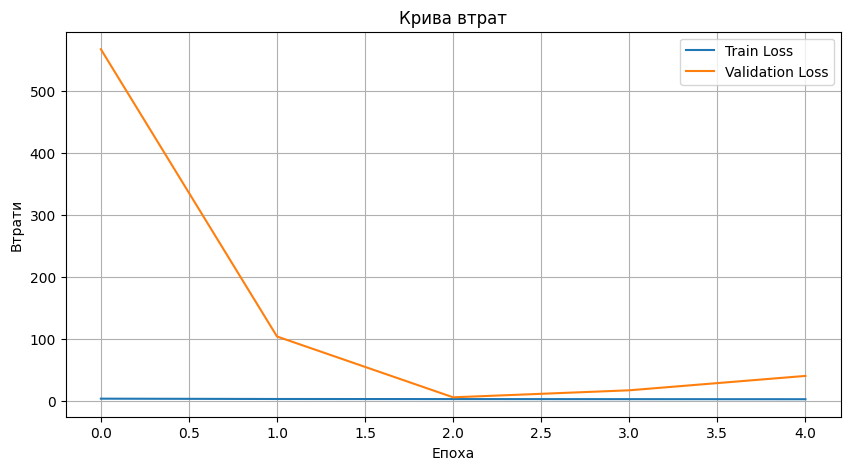

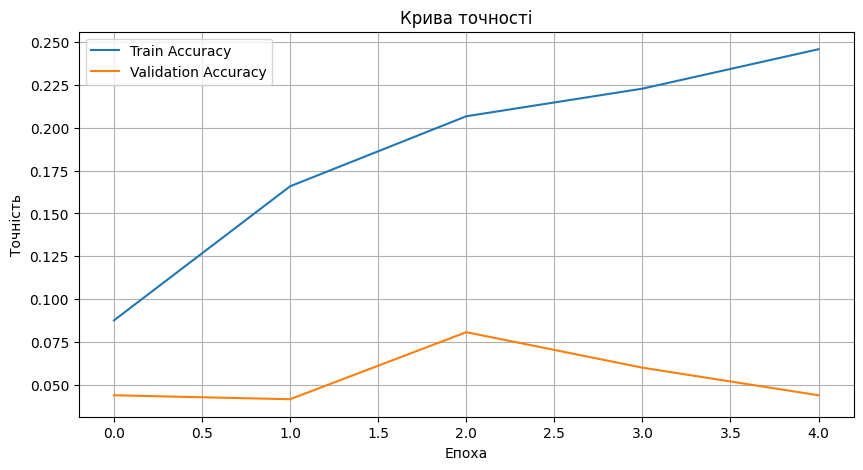

In [22]:
import matplotlib.pyplot as plt

# --- Побудова графіку втрат ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['loss'], label='Train Loss')
plt.plot(history_mn.history['val_loss'], label='Validation Loss')
plt.title('Крива втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)
plt.show()

# --- Побудова графіку точності ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['accuracy'], label='Train Accuracy')
plt.plot(history_mn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Крива точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/test_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(test_dir) if
                  os.path.isdir(os.path.join(test_dir, d))]

categories = sorted(os.listdir(test_dir))
categories = [category for category in categories if category != '.DS_Store']


df = pd.DataFrame(columns=['image_path', 'label'])

dfs = []

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)


dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

test_df = pd.concat(dfs, ignore_index=True)


test_datagen = ImageDataGenerator(
    # rescale=1. / 255
)

test_images = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 930 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [24]:
predictions = model_mn.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes[:80]

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


array([ 5, 16, 16, 30, 16, 16,  5, 27, 30, 16,  5, 30, 16, 27,  6,  3, 16,
       12,  3,  5, 27, 27, 30,  5, 12, 16,  6, 16,  6, 30,  3, 27,  9, 27,
        3, 27, 27, 27,  9,  3,  9,  9, 28,  9,  9, 27, 27, 27,  9, 28, 27,
       27, 28, 27, 27, 28, 30,  9, 27, 27, 27, 27,  3, 27, 27,  3, 27, 30,
       27,  3, 30, 27, 27, 27, 27, 27, 27, 16, 27,  9])

In [25]:
true_classes = test_images.classes
class_labels = list(val_images.class_indices.keys())
num_images = 25
count = 0

while count < num_images:
    print(f"{count + 1}. Label: {true_classes[count]}, Prediction: {predicted_classes[count]}")
    count += 1

1. Label: 0, Prediction: 5
2. Label: 0, Prediction: 16
3. Label: 0, Prediction: 16
4. Label: 0, Prediction: 30
5. Label: 0, Prediction: 16
6. Label: 0, Prediction: 16
7. Label: 0, Prediction: 5
8. Label: 0, Prediction: 27
9. Label: 0, Prediction: 30
10. Label: 0, Prediction: 16
11. Label: 0, Prediction: 5
12. Label: 0, Prediction: 30
13. Label: 0, Prediction: 16
14. Label: 0, Prediction: 27
15. Label: 0, Prediction: 6
16. Label: 0, Prediction: 3
17. Label: 0, Prediction: 16
18. Label: 0, Prediction: 12
19. Label: 0, Prediction: 3
20. Label: 0, Prediction: 5
21. Label: 0, Prediction: 27
22. Label: 0, Prediction: 27
23. Label: 0, Prediction: 30
24. Label: 0, Prediction: 5
25. Label: 0, Prediction: 12


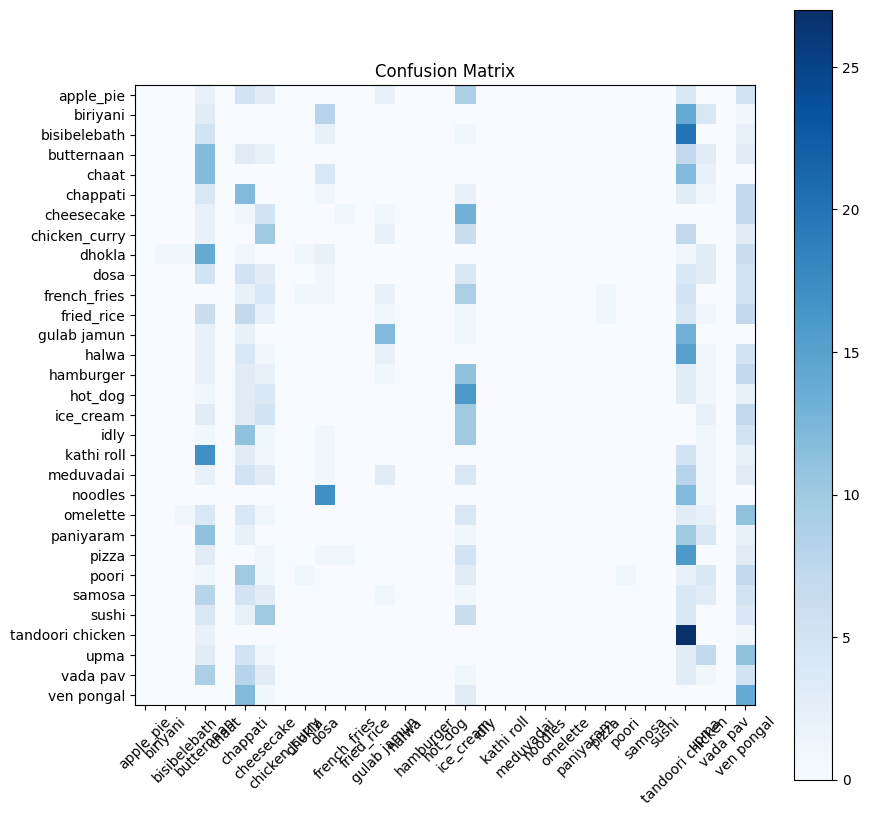

In [26]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.show()

In [27]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

                  precision    recall  f1-score   support

       apple_pie       0.00      0.00      0.00        30
        biriyani       0.00      0.00      0.00        30
    bisibelebath       0.00      0.00      0.00        30
      butternaan       0.08      0.40      0.14        30
           chaat       0.00      0.00      0.00        30
        chappati       0.10      0.40      0.16        30
      cheesecake       0.07      0.17      0.10        30
   chicken_curry       0.00      0.00      0.00        30
          dhokla       0.33      0.03      0.06        30
            dosa       0.03      0.03      0.03        30
    french_fries       0.00      0.00      0.00        30
      fried_rice       0.00      0.00      0.00        30
     gulab jamun       0.44      0.40      0.42        30
           halwa       0.00      0.00      0.00        30
       hamburger       0.00      0.00      0.00        30
         hot_dog       0.00      0.00      0.00        30
       ice_cr

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

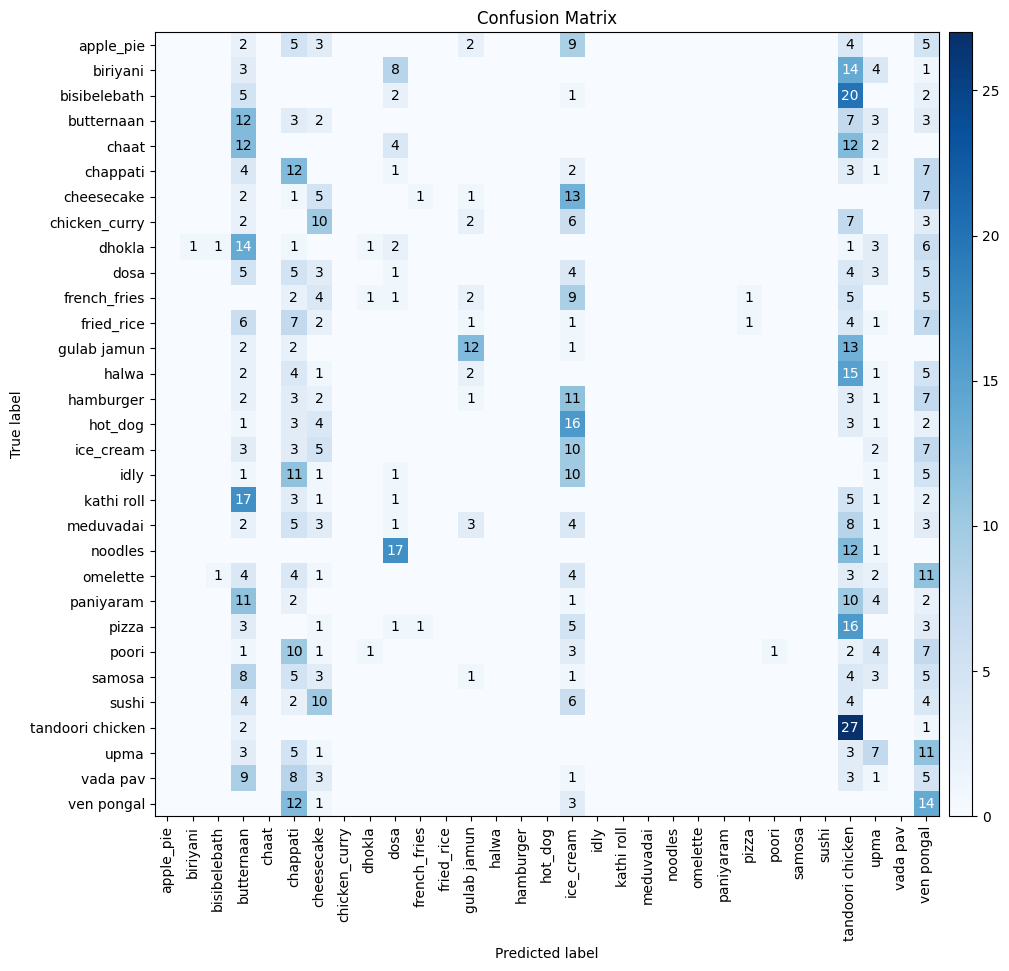

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Припускаємо, що у тебе вже є:
# true_classes = [...]
# predicted_classes = [...]
# class_labels = [...]

cm = confusion_matrix(true_classes, predicted_classes)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')

tick_marks = np.arange(len(class_labels))
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels)

# Підпис значень у клітинках, крім 0
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Зменшення ширини colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # size визначає ширину
plt.colorbar(im, cax=cax)

fig.tight_layout()
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()